<a href="https://colab.research.google.com/github/caesar013/PCVK_GENAP_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [10]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [11]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/female.tiff')
img_s = cv.resize(img, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

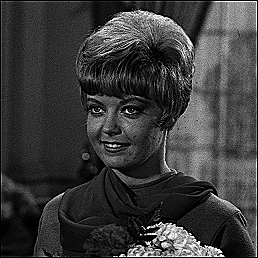

In [12]:
# Sharpen

kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

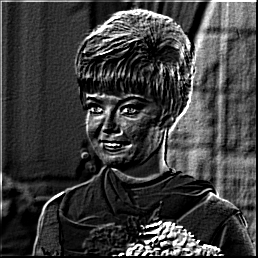

In [13]:
# Emboss

kernel_embos = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

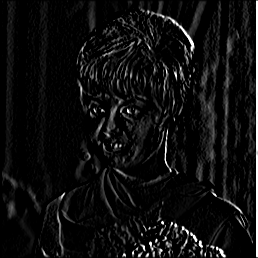

In [14]:
# Left Sobel Edge Detection

kernel_sobel = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

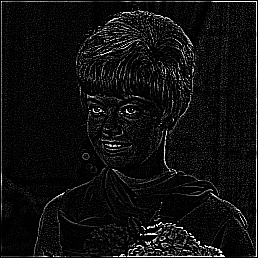

In [15]:
# Canny edge Detection

kernel_edge = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

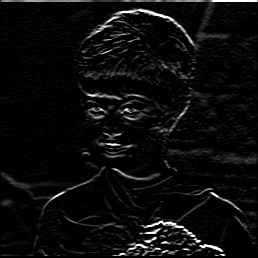

In [16]:
# Prewitt Edge Detection
kernel_prewitt= np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

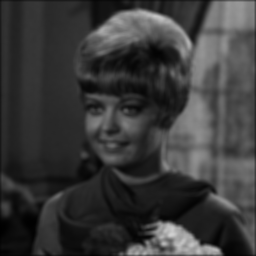

In [17]:
# 5x5 Gaussian Blur

kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss= gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, kernel_gauss, 1, 2))

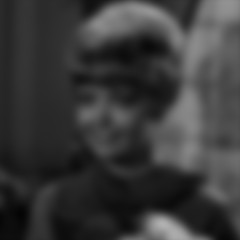

In [18]:
# 21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

# Tugas

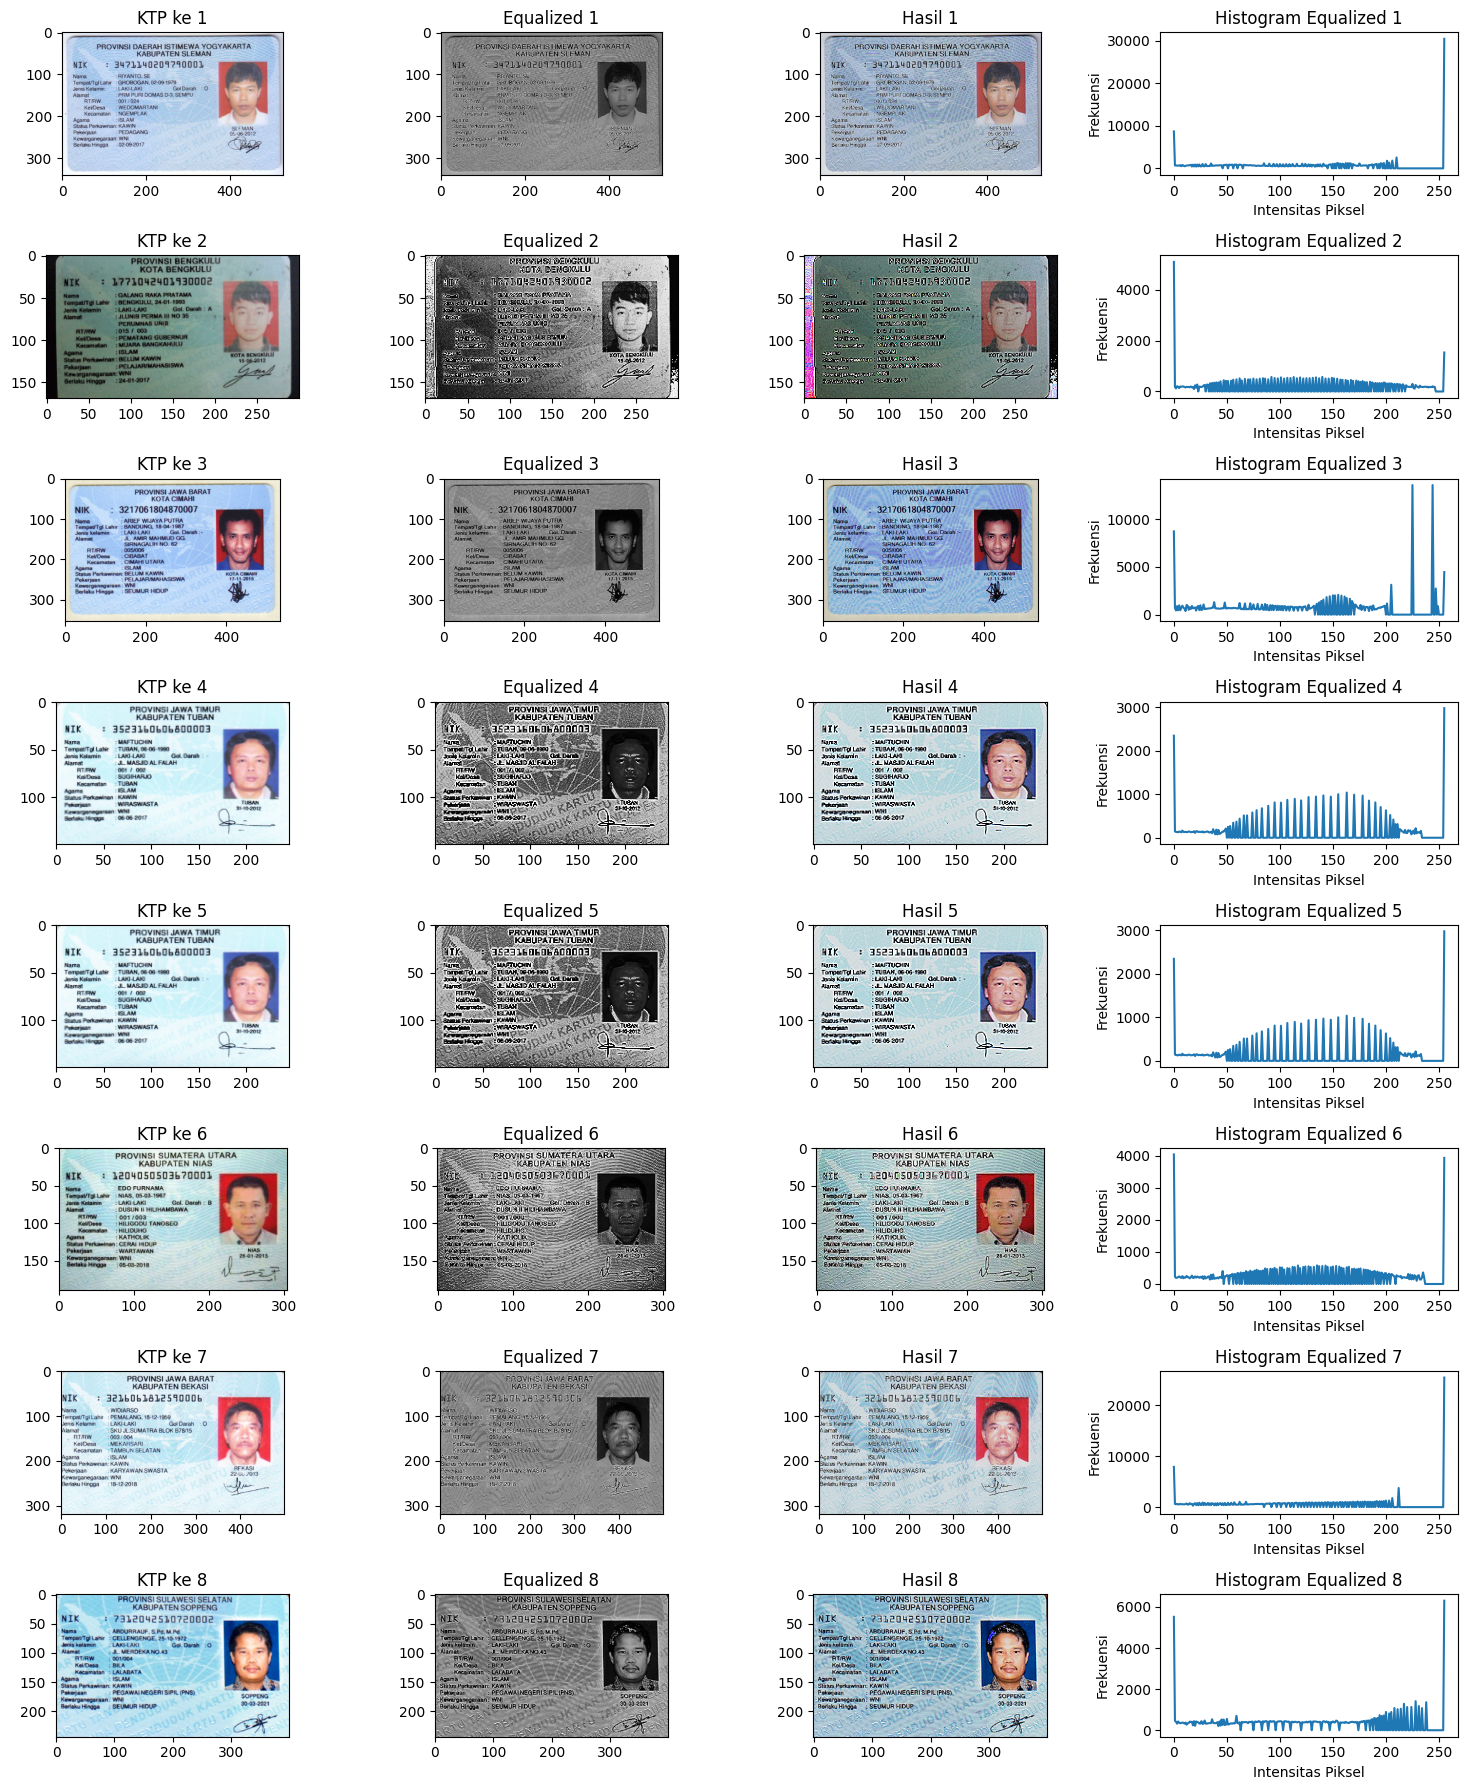

In [21]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# path folder
folder_path = '/content/drive/MyDrive/PCVK/KTP_More'

# daftar file citra dalam folder
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv2.imread(ktp_path)

    # mengubah ukuran gambar KTP
    ktp_image_resized = cv2.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # brightness
    hsv = cv2.cvtColor(ktp_image_resized, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = np.clip(v - 30, 0, 255)  # Penyesuaian kecerahan
    hsv = cv2.merge((h, s, v))
    brightness_adjusted = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # sharpen
    kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    result = cv2.filter2D(brightness_adjusted, -1, kernel_sharpen)

    # melakukan histogram equalization
    result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    result_equalized = cv2.equalizeHist(result_gray)
    result_equalized_color = cv2.cvtColor(result_equalized, cv2.COLOR_GRAY2BGR)

    # menampilkan gambar asli dengan label pada kolom ke-1
    axs[i, 0].imshow(cv2.cvtColor(ktp_image_resized, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP ke {i+1}')

    # menampilkan gambar hasil equalisasi dengan label pada kolom ke-2
    axs[i, 1].imshow(cv2.cvtColor(result_equalized_color, cv2.COLOR_BGR2RGB))
    axs[i, 1].set_title(f'Equalized {i+1}')

   # menampilkan gambar yang telah diolah dengan label pada kolom ke-3
    axs[i, 2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Hasil {i+1}')

    # menghitung histogram gambar hasil equalisasi
    hist_equalized = cv2.calcHist([result_equalized], [0], None, [256], [0, 256])

    # menampilkan histogram pada kolom ke-4 dengan label
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized {i+1}')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

# Tampilkan hasil keseluruhan
plt.tight_layout()
plt.show()